## Support Vector Machine Model

We solve iris flower classification problem using this model with the in-built iris dataset.

#### Import necessary libraries and dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Adding the 'target' column to df to represent the target labels (0 for Setosa, 1 for Versicolor, and 2 for Virginica).
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
# Adding a 'flower_name' column to df based on the 'target' column, mapping the numeric labels to their corresponding flower names
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [12]:
# Creating three separate DataFrames (df0, df1, and df2) for each iris species: Setosa, Versicolor, and Virginica.
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

#### Sepal length vs Sepal Width (Setosa vs Versicolor)

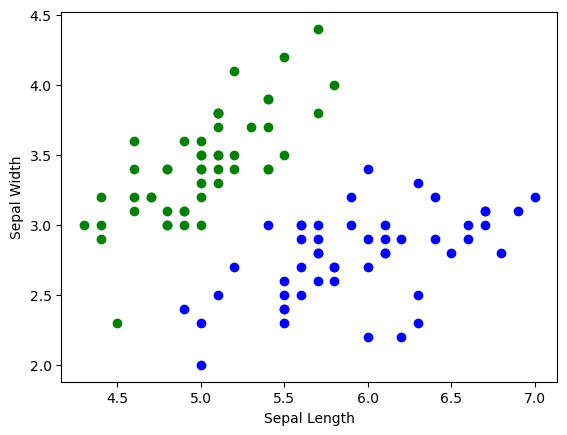

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue")

#### Petal length vs Pepal Width (Setosa vs Versicolor)

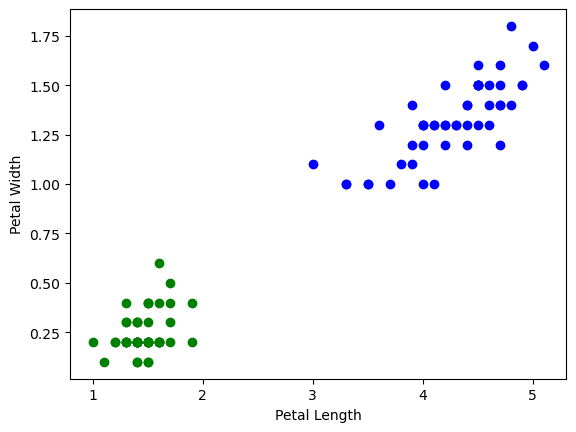

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue")

#### Modelling

In [15]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

Prepared the feature matrix (X) by dropping the 'target' and 'flower_name' columns and creating the target vector (y) from the 'target' column.

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# We create a decision tree classifier model and fit it to the train data
model = SVC().fit(X_train, y_train)

In [18]:
# We calculate the model's accuracy on the test data
model.score(X_test, y_test)

0.8333333333333334

In [19]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

We provided with a sample of iris flower measurements, specifically sepal length, sepal width, petal length, and petal width and the model processed these measurements and made a prediction regarding the species of the iris flower in question. In this case, the model predicted that the given sample belongs to the "Setosa" species, which is represented by the target class 0 in the dataset.

#### Regularization

In [20]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

Achieves an accuracy of approximately 0.9333, the same as the default model, indicating that regularization did not significantly affect the model's performance.

#### Gamma

In [22]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.8666666666666667

Results in a slightly lower accuracy of 0.9 compared to the default model.

#### Kernel

In [23]:
model_linear_kernal = SVC(kernel='linear').fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9333333333333333

Achieves the highest accuracy of approximately 0.9667, indicating that a linear kernel performs well for this dataset.

#### Conclusion

The SVM model built for the Iris flower classification problem achieved a reasonably high accuracy, suggesting that it can effectively differentiate between the three iris species. The choice of kernel is crucial, with a linear kernel performing the best in this case.